In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('advertising.csv')

In [4]:
# xem du lieu
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Sử dụng dụng biểu đồ scatter để trực quan hóa mối quan hệ giữa lượng sản phẩm bán ra và chi phí quảng cáo từng loại hình

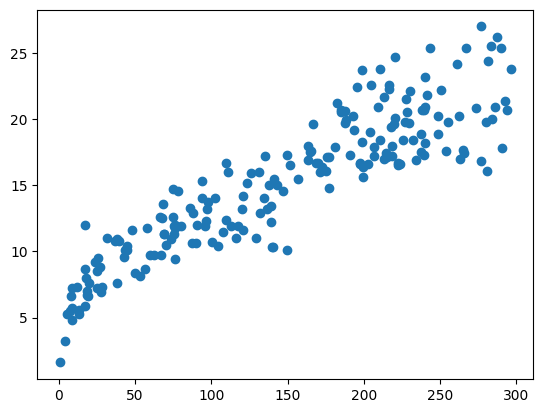

In [5]:
plt.scatter(df['TV'], df['Sales'])

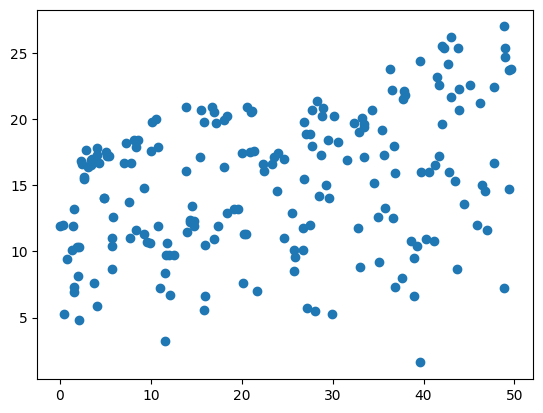

In [6]:
plt.scatter(df['Radio'], df['Sales'])

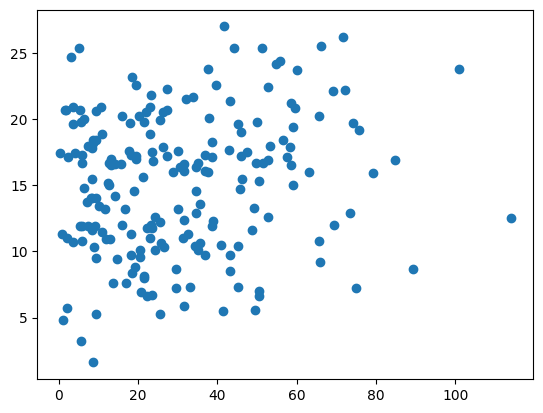

In [7]:
plt.scatter(df['Newspaper'], df['Sales'])

### Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra.

In [16]:
# Đâu là biến dự đoán (độc lập), đâu là biến kết quả (phụ thuộc)
x = df[['TV']]
y = df['Sales']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 102)

In [18]:
# Xay mo hinh
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [19]:
# Doc ket qua
coefficient = lr.coef_
coefficient

array([0.0556326])

In [20]:
intercept = lr.intercept_
intercept

6.926176208909794

In [23]:
# Danh gia mo hinh
y_pred = lr.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 1.828701750319577
Mean Squared Error: 4.686266464866949
Root Mean Squared Error: 2.16477861798082


In [25]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là lượng hàng bán ra, các biến đầu vào là chi phí cho cả 3 loại hình quảng cáo. Đánh giá mô hình

In [26]:
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=102)

In [33]:
# Xay mo hinh
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [35]:
coefficient = lr.coef_
coefficient

array([ 0.05493914,  0.10595092, -0.00329966])

In [36]:
intercept = lr.intercept_
intercept

4.717762302159215

In [37]:
y_pred = lr.predict(x_test)
y_pred

array([20.22435617, 14.17995651, 17.06471356, 15.27186819, 10.15705425,
       22.14919632, 10.09935184,  7.40521394,  5.40943618, 17.57488804,
       20.69399915, 15.16770322, 10.29719634, 13.07294751, 16.41223304,
       10.12925835, 24.00517075,  9.12133082, 14.89259401, 11.44262449,
       11.03600569, 20.19392651, 24.53000368, 13.79591751, 22.13063583,
       24.94641258, 12.0284419 , 20.63766821, 10.95480837, 19.41685714,
       21.89086545, 13.87341634, 15.40621586,  7.88345029, 12.69628988,
       20.81908092, 18.86203448, 21.42762642, 18.22312192, 16.01117611])

In [39]:
# Danh gia mo hinh

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.1265160714456315
Mean Squared Error: 2.0769463234890884
Root Mean Squared Error: 1.441161449487561
